#  Mini Project 1
### operations that I have performed
- Load collected data from CSV
- Applied **K-Means clustering** to label the data
- Trained **SVM** and **Decision Tree** classifiers
- Visualized results and confusion matrices
- Saved labeled dataset and output plots

## First I have imported required libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

# This is outputs folder
os.makedirs("outputs", exist_ok=True)

## Step 1: Then I have load my Dataset

In [23]:
# this Loads dataset
df = pd.read_csv("stroop_test_data.csv")

# this displays the first few rows of the dataset
print("Dataset loaded successfully.")
print("First few rows of the dataset:")
df.head()

Dataset loaded successfully.
First few rows of the dataset:


,User_ID,Accuracy_Percent,Avg_Reaction_Time_Seconds
0,1,90.6,1.32
1,2,86.2,1.58
2,3,95.7,1.15
3,4,78.3,1.89
4,5,92.0,1.28


##  Step 2: Then I have featured selection & scaling

In [24]:
# this Selects features for clustering and classification
# 'Accuracy_Percent' and 'Avg_Reaction_Time_Seconds' are the features
X = df[["Accuracy_Percent", "Avg_Reaction_Time_Seconds"]]

# this Visualizes the dataset using a scatter plot
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##  Step 3: Then I have applied K-Means clustering

In [25]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
df["Cluster_Label"] = kmeans.fit_predict(X_scaled)

# this Visualizes the clusters
df.head()

,User_ID,Accuracy_Percent,Avg_Reaction_Time_Seconds,Cluster_Label
0,1,90.6,1.32,1
1,2,86.2,1.58,1
2,3,95.7,1.15,1
3,4,78.3,1.89,0
4,5,92.0,1.28,1


##  Step 4: Then plotted functions to visualize clustered data

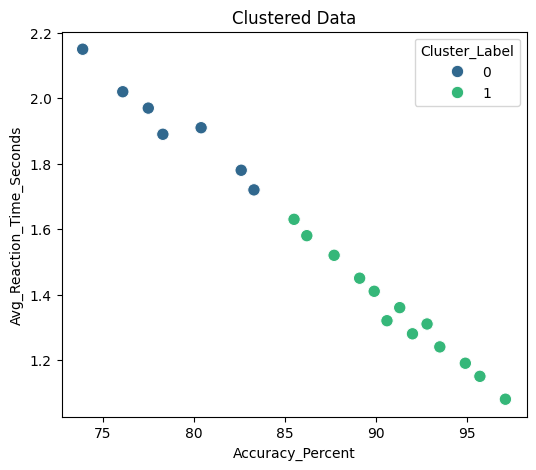

In [26]:
# this Visualizes the clustered data
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x="Accuracy_Percent", y="Avg_Reaction_Time_Seconds",
                hue="Cluster_Label", palette='viridis', s=80)
plt.title("Clustered Data")
plt.savefig("outputs/Data_Visualize.jpg")
plt.show()

##  Step 5: Afetr that I have done Train/Test split

In [27]:
# this Prepares data for classification
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df['Cluster_Label'], test_size=0.2, random_state=42
)

print(f"Train size: {len(X_train)} | Test size: {len(X_test)}")

Train size: 16 | Test size: 4


##  Step 6: Then trained SVM classifier

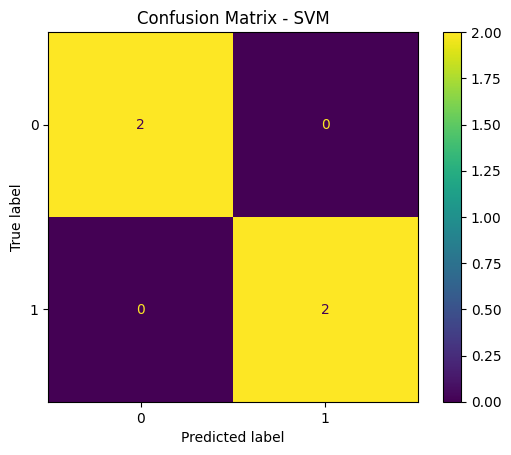

✅ SVM Accuracy: 1.0


In [28]:

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)

# this is Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, pred_svm)
ConfusionMatrixDisplay(confusion_matrix=cm_svm).plot()
plt.title("Confusion Matrix - SVM")
plt.savefig("outputs/Confusion_Matrix_SVM.jpg")
plt.show()

print("✅ SVM Accuracy:", accuracy_score(y_test, pred_svm))

##  Step 7: Then I have trained Decision Tree Classifier

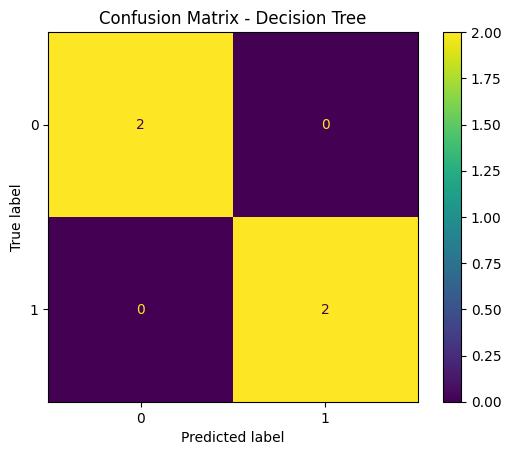

✅ Decision Tree Accuracy: 1.0


In [29]:
# this is Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

#this is Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_dt).plot()
plt.title("Confusion Matrix - Decision Tree")
plt.savefig("outputs/Confusion_Matrix_DT.jpg")
plt.show()

print("✅ Decision Tree Accuracy:", accuracy_score(y_test, pred_dt))

##  Step 8: Then plotted to visualize Decision Tree

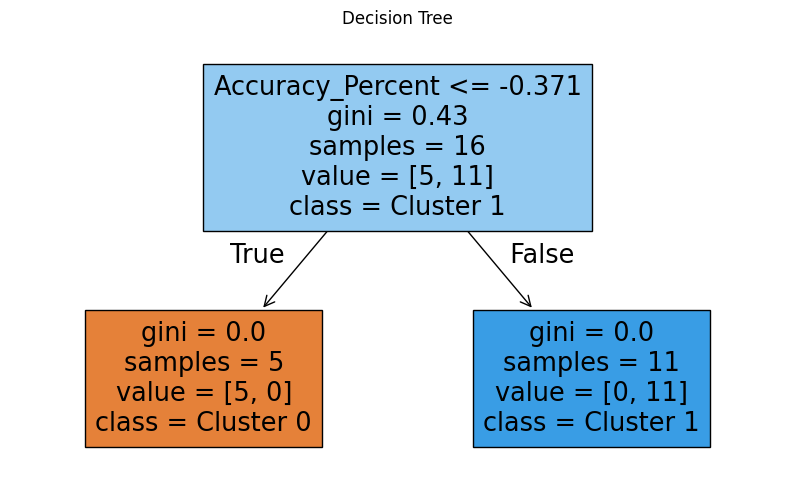

In [30]:
# this Visualizes the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(dt,
          feature_names=["Accuracy_Percent", "Avg_Reaction_Time_Seconds"],
          class_names=['Cluster 0', 'Cluster 1'],
          filled=True)
plt.title("Decision Tree")
plt.show()

## Step 9: Finally i have Saved Labeled Dataset

In [31]:
# this saves the labeled data to a new CSV file
df.to_csv("stroop_test_data_labeled.csv", index=False)
print("Labeled data saved as stroop_test_data_labeled.csv")

Labeled data saved as stroop_test_data_labeled.csv
